# Web scrapping: Liverpool Fc - Team
website: https://www.liverpoolfc.com/team/first-team
using CSS Selector Style

In [1]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
from PIL import Image
import io

In [2]:
url = 'https://www.liverpoolfc.com/team/first-team'
r = requests.get(url)
r.text[:100]

'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://openg'

In [3]:
s = BeautifulSoup(r.text, 'lxml')
type(s)

bs4.BeautifulSoup

In [4]:
#มีการจัด indent
print(s.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement);

    if (window.history.replaceState && windo

In [5]:
# CSS Selector
members = s.select('li.team-player-list-item')
# members = s.find_all('li' , {'class' : 'team-player-list-item'})

In [6]:
members

[<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
 <div class="img-wrap">
 <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
 </div>
 <div class="number">1</div>
 <div class="about">
 <div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/adrian">
 <div class="img-wrap">
 <img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"/>
 </div>
 <div class="number">13</div>
 <div class="about">
 <div class="name">
 <span>Adrian</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/loris-karius">
 <div class="img-wrap">
 <img alt="Loris Karius" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.j

In [7]:
len(members)

37

In [8]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [9]:
print(members[0].prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
  <div class="img-wrap">
   <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   1
  </div>
  <div class="about">
   <div class="name">
    <span>
     Alisson
    </span>
    <span>
     Becker
    </span>
   </div>
  </div>
 </a>
</li>



In [10]:
members[0].select_one('a')
# members[0].find('a')

<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>

In [11]:
members[0].select_one('a')['href']
# members[0].find('a')['href']

'/team/first-team/player/alisson-becker'

# ดึงเลขนักเตะ

In [12]:
members[0].select_one('div.number')
# members[0].find('div' , {'class' : 'number'})

<div class="number">1</div>

In [13]:
members[0].select_one('div.number').text
# members[0].find('div' , {'class' : 'number'}).text

'1'

# ดึงชื่อนักเตะในหลากหลายรูปแบบ

In [14]:
members[0].select_one('div.name')
# members[0].find('div' , {'class' : 'name'})

<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>

In [15]:
members[0].select_one('div.name').select('span')[0].text 
# members[0].find('div' , {'class' : 'name'}).find_all('span')[0].text

'Alisson'

In [16]:
members[0].select_one('div.name').select('span')[1].text 
# members[0].find('div' , {'class' : 'name'}).find_all('span')[1].text

'Becker'

In [17]:
members[0].select_one('div.name>span')
# members[0].find('div' , {'class' : 'name'}).find_all('span')[0].text

<span>Alisson</span>

In [18]:
members[0].select('div.name>span')
# members[0].find('div' , {'class' : 'name'}).find_all('span')

[<span>Alisson</span>, <span>Becker</span>]

In [19]:
members[0].select('div.name>span')[0].text
# members[0].find('div' , {'class' : 'name'}).find_all('span')[0].text

'Alisson'

In [20]:
members[0].select('div.name>span')[1].text
# members[0].find('div' , {'class' : 'name'}).find_all('span')[1].text

'Becker'

In [21]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [22]:
members[0].select_one('img')
# members[0].find('img')

<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>

In [23]:
type(members[0].select_one('img'))

bs4.element.Tag

In [24]:
members[0].select_one('img')['alt']
# members[0].find('img')['alt']

'Alisson Becker'

In [25]:
members[0].select_one('img')['alt'].split(' ')

['Alisson', 'Becker']

In [26]:
members[0].select_one('img')['src']
# members[0].find('img')['src']

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg'

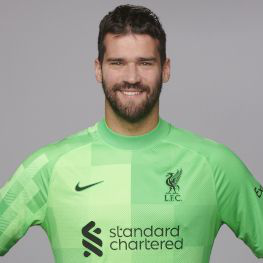

In [27]:
r1 = requests.get(members[0].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

# สร้าง Dataframe

In [28]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [29]:
lst = []
# for e in members[:3]:
for e in members:
    mem_img_url = e.select_one('img')['src']
    mem_name = e.select_one('img')['alt']
    mem_number = e.select_one('div.number').text
    mem_link = f"https://www.liverpoolfc.com{e.select_one('a')['href']}"
    print(f'{mem_img_url} {mem_name} {mem_number} {mem_link}')
    lst.append([mem_name, mem_number, mem_img_url, mem_link])
lst

https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg Alisson Becker 1 https://www.liverpoolfc.com/team/first-team/player/alisson-becker
https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg Adrian 13 https://www.liverpoolfc.com/team/first-team/player/adrian
https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg Loris Karius 22 https://www.liverpoolfc.com/team/first-team/player/loris-karius
https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg Caoimhin Kelleher 62 https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg Marcelo Pitaluga  https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga
https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_1225

[['Alisson Becker',
  '1',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/alisson-becker'],
 ['Adrian',
  '13',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/adrian'],
 ['Loris Karius',
  '22',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/loris-karius'],
 ['Caoimhin Kelleher',
  '62',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher'],
 ['Marcelo Pitaluga',
  '',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/

In [30]:
pd.options.display.max_colwidth = 0

In [31]:
df = pd.DataFrame(lst, columns = ['name', 'number', 'img_url', 'link'])
df

,name,number,img_url,link
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian
2,Loris Karius,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/loris-karius
3,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
4,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga
5,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk
6,Joe Gomez,12,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez
7,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/andy-robertson
9,Ben Davies,28,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122678_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/ben-davies


In [32]:
from IPython.display import HTML

In [33]:
def to_html_img(url, alt=None, width=100):
    if alt == None:
        alt = ''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [34]:
to_html_img('https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg')

'<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg" width="100"/>'

In [35]:
df['img'] = df.apply(lambda r: to_html_img(r['img_url'], r['name']), axis = 1)
df

,name,number,img_url,link,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"" width=""100""/>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"" width=""100""/>"
2,Loris Karius,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/loris-karius,"<img alt=""Loris Karius"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg"" width=""100""/>"
3,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg"" width=""100""/>"
4,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga,"<img alt=""Marcelo Pitaluga"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg"" width=""100""/>"
5,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg"" width=""100""/>"
6,Joe Gomez,12,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg"" width=""100""/>"
7,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas,"<img alt=""Kostas Tsimikas"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg"" width=""100""/>"
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/andy-robertson,"<img alt=""Andy Robertson"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg"" width=""100""/>"
9,Ben Davies,28,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122678_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/ben-davies,"<img alt=""Ben Davies"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122678_misc_general_500.jpeg"" width=""100""/>"


In [36]:
HTML(df[:5][['name', 'number', 'img']].to_html(escape = False))

,name,number,img
0,Alisson Becker,1,
1,Adrian,13,
2,Loris Karius,22,
3,Caoimhin Kelleher,62,
4,Marcelo Pitaluga,,


In [37]:
def to_html_a(url, text):
    if text == None:
        text = ''
    return f'<a href="{url}">{text}</a>'

In [38]:
to_html_a('https://www.liverpoolfc.com/team/first-team/player/alisson-becker', '<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg" width="100"/></a>')

'<a href="https://www.liverpoolfc.com/team/first-team/player/alisson-becker"><img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg" width="100"/></a></a>'

In [39]:
df

,name,number,img_url,link,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"" width=""100""/>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"" width=""100""/>"
2,Loris Karius,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/loris-karius,"<img alt=""Loris Karius"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg"" width=""100""/>"
3,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg"" width=""100""/>"
4,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga,"<img alt=""Marcelo Pitaluga"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg"" width=""100""/>"
5,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg"" width=""100""/>"
6,Joe Gomez,12,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg"" width=""100""/>"
7,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas,"<img alt=""Kostas Tsimikas"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg"" width=""100""/>"
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/andy-robertson,"<img alt=""Andy Robertson"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg"" width=""100""/>"
9,Ben Davies,28,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122678_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/ben-davies,"<img alt=""Ben Davies"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122678_misc_general_500.jpeg"" width=""100""/>"


In [40]:
df['a'] = df.apply(lambda r: to_html_a(r['link'], r['name']), axis = 1)
df

,name,number,img_url,link,img,a
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker"">Alisson Becker</a>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/adrian"">Adrian</a>"
2,Loris Karius,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/loris-karius,"<img alt=""Loris Karius"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/loris-karius"">Loris Karius</a>"
3,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher"">Caoimhin Kelleher</a>"
4,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga,"<img alt=""Marcelo Pitaluga"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga"">Marcelo Pitaluga</a>"
5,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk"">Virgil van Dijk</a>"
6,Joe Gomez,12,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122621_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/joe-gomez"">Joe Gomez</a>"
7,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas,"<img alt=""Kostas Tsimikas"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122654_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas"">Kostas Tsimikas</a>"
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/andy-robertson,"<img alt=""Andy Robertson"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122662_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/andy-robertson"">Andy Robertson</a>"
9,Ben D

In [41]:
HTML(df[:5][['name', 'number', 'img', 'a']].to_html(escape = False))

,name,number,img,a
0,Alisson Becker,1,,Alisson Becker
1,Adrian,13,,Adrian
2,Loris Karius,22,,Loris Karius
3,Caoimhin Kelleher,62,,Caoimhin Kelleher
4,Marcelo Pitaluga,,,Marcelo Pitaluga


In [42]:
df['a2'] = df.apply(lambda r: to_html_a(r['link'], r['img']), axis = 1)
df

,name,number,img_url,link,img,a,a2
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker"">Alisson Becker</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/alisson-becker""><img alt=""Alisson Becker"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122566_misc_general_500.jpeg"" width=""100""/></a>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/adrian"">Adrian</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/adrian""><img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122629_misc_general_500.jpeg"" width=""100""/></a>"
2,Loris Karius,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/loris-karius,"<img alt=""Loris Karius"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/loris-karius"">Loris Karius</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/loris-karius""><img alt=""Loris Karius"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/11/thumb_110104_misc_general_500.jpeg"" width=""100""/></a>"
3,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher"">Caoimhin Kelleher</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher""><img alt=""Caoimhin Kelleher"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122734_misc_general_500.jpeg"" width=""100""/></a>"
4,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga,"<img alt=""Marcelo Pitaluga"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga"">Marcelo Pitaluga</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/marcelo-pitaluga""><img alt=""Marcelo Pitaluga"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122933_misc_general_500.jpeg"" width=""100""/></a>"
5,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/23/thumb_122574_misc_general_500.jpeg"" width=""100""/>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk"">Virgil van Dijk</a>","<a href=""https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk""><img alt=""Virgil van Dijk"" src=""https://d3j2s6hdd6a

In [43]:
HTML(df[['number', 'a', 'a2']].to_html(escape = False))

,number,a,a2
0,1,Alisson Becker,
1,13,Adrian,
2,22,Loris Karius,
3,62,Caoimhin Kelleher,
4,,Marcelo Pitaluga,
5,4,Virgil van Dijk,
6,12,Joe Gomez,
7,21,Kostas Tsimikas,
8,26,Andy Robertson,
9,28,Ben Davies,


# Save Dataframe

In [44]:
# df.to_excel('liverpool_team.xlsx', index=False)